### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\HP\Documents\Imarticus Data Science\ML\Logistic Regression\xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

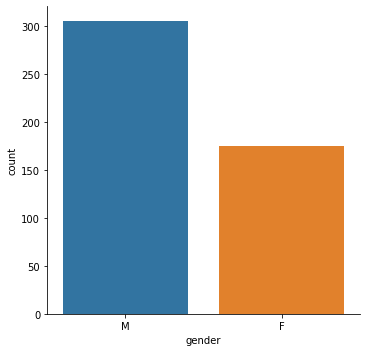

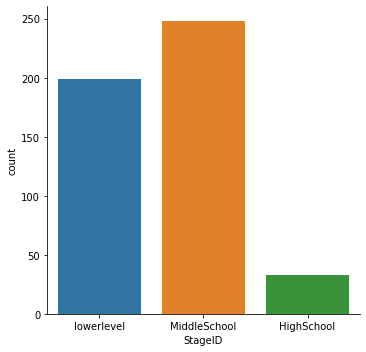

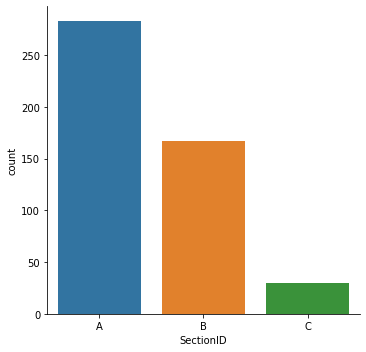

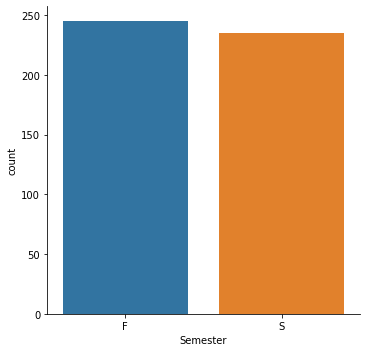

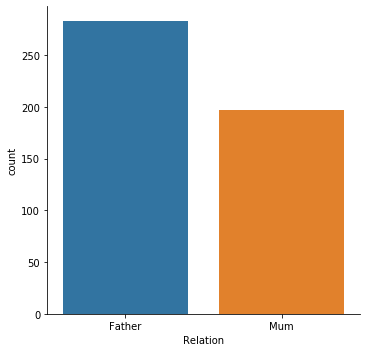

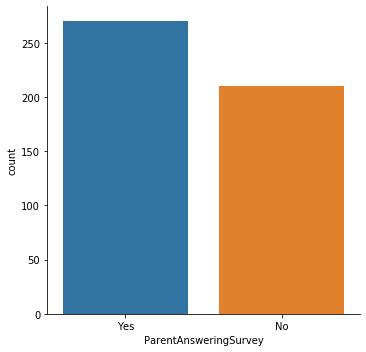

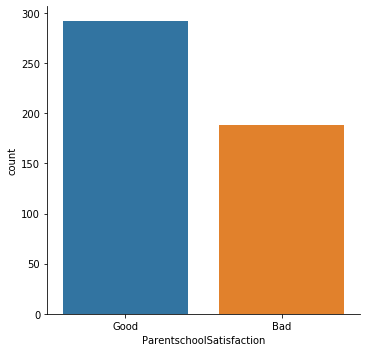

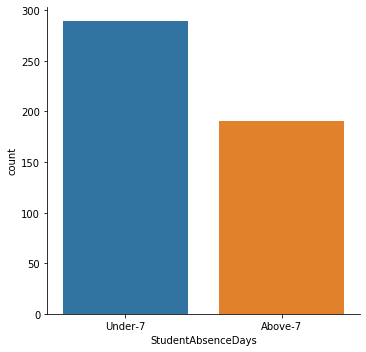

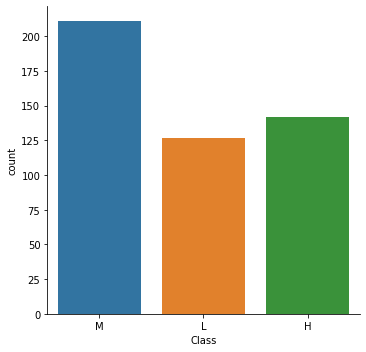

In [12]:
import seaborn as sns
df=data.drop(['NationalITy','PlaceofBirth','GradeID','Topic','raisedhands','VisITedResources','AnnouncementsView','Discussion'],axis=1)
for i in df: 
    sns.catplot(x=i,kind='count',data=df)

### 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

In [13]:
category={'M':1,'F':2,'lowerlevel':0,'MiddleSchool':1,'HighSchool':2,'A':1,'B':2,'C':3,'S':1,'Father':0,'Mum':1,'Yes':1,'No':0,'Good':1,'Bad':0,'Under-7':0,'Above-7':1,'L':2,'H':3}
df['gender']=df['gender'].map(category)
df['StageID']=df['StageID'].map(category)
df['SectionID']=df['SectionID'].map(category)
df['Semester']=df['Semester'].map(category)
df['Relation']=df['Relation'].map(category)
df['ParentAnsweringSurvey']=df['ParentAnsweringSurvey'].map(category)
df['ParentschoolSatisfaction']=df['ParentschoolSatisfaction'].map(category)
df['StudentAbsenceDays']=df['StudentAbsenceDays'].map(category)
df['Class']=df['Class'].map(category)


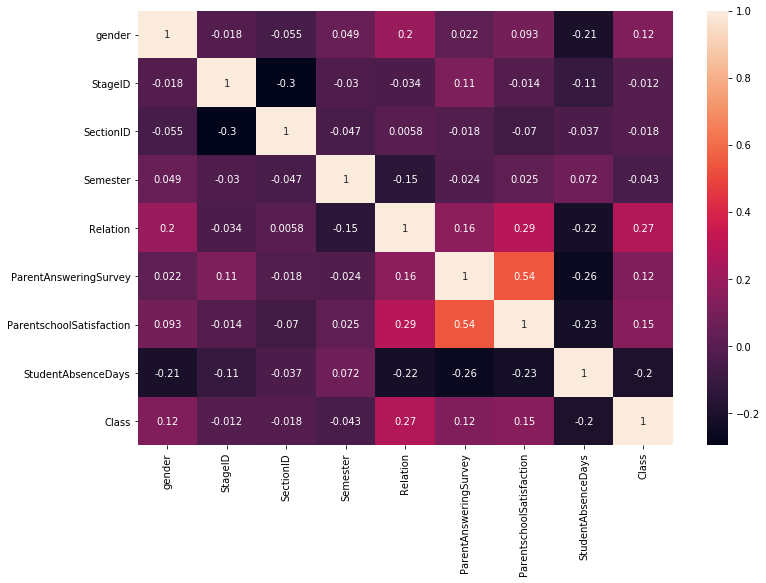

In [14]:
import numpy as np
fig,ax=plt.subplots(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,ax=ax,annot=True)
plt.show()

### 3. Visualize categorical variables with numerical variables and give conclusions?

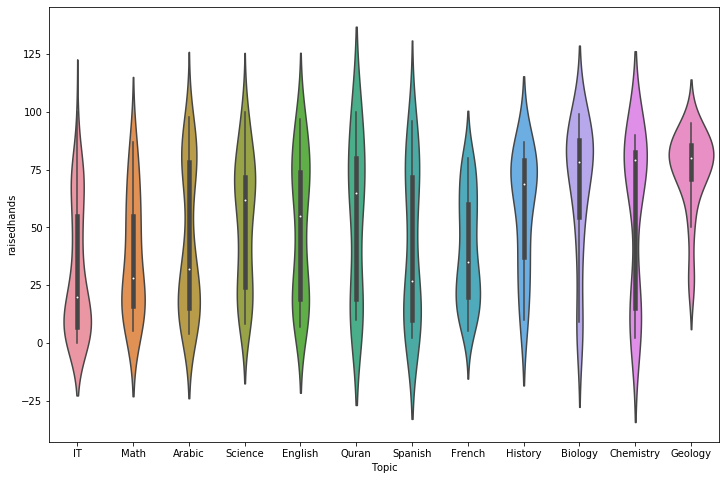

In [15]:
fig,ax1=plt.subplots(figsize=(12,8))
sns.violinplot(x='Topic',y='raisedhands',data=data,ax=ax1)
plt.show()

### 4. From the above result, what are the factors that leads to get low grades of the students?

### 5. Build classification model and present it's classification report ?

In [17]:
df=pd.concat([df,data['raisedhands'],data['VisITedResources'],data['AnnouncementsView'],data['Discussion']],axis=1)
df

,gender,StageID,SectionID,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,0,1,2,0,1,1,0,1,15,16,2,20
1,1,0,1,2,0,1,1,0,1,20,20,3,25
2,1,0,1,2,0,0,0,1,2,10,7,0,30
3,1,0,1,2,0,0,0,1,2,30,25,5,35
4,1,0,1,2,0,0,0,1,1,40,50,12,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2,1,1,1,0,0,0,1,2,5,4,5,8
476,2,1,1,2,0,0,0,0,1,50,77,14,28
477,2,1,1,1,0,0,0,0,1,55,74,25,29
478,2,1,1,2,0,0,0,1,2,30,17,14,57


In [18]:
x=df.drop(['ParentAnsweringSurvey'],axis=1)
y=df['ParentAnsweringSurvey']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7833333333333333
[[31 16]
 [10 63]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        47
           1       0.80      0.86      0.83        73

    accuracy                           0.78       120
   macro avg       0.78      0.76      0.77       120
weighted avg       0.78      0.78      0.78       120



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
